## PROJECT PHASE 4 - 
Task - success/failure analysis + kitchen sink

# Load all the Libraries

### Loading all the Libraries for executing the below Python code and functions# 

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
 
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Read data from BigMart datasets for Train and Test

In [123]:
train = pd.read_csv("BIGMART/train.csv")
test = pd.read_csv("BIGMART/test.csv")

# Dimension of dataset and combine the Test and Train data

### Summary of the overall dataset - The data set has total of 14204 rows with 13 attributes. 
### Train has 8523 and 5681 in test dataset

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


# First Ten Records of Train

In [4]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


# First 10 Records for Test Set

In [5]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,test
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [6]:
#Describe the Train data
print(train.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [7]:
#Describe the Test data
print(test.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000


# Describe the Combinded data set

In [8]:
#Describe the Full data (Train + Test)
print(data.describe())

           Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000  


# Data Exploration and Visualization

In [9]:
# We can see the columns with Null instances
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [10]:
# Unique values with in Attributes -
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

# Explore the Categorical Attributes from Combined dataset

In [11]:
#Filter categorical variables
categorical_attributes = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_attributes = [x for x in categorical_attributes if x not in ['Item_Identifier','Outlet_Identifier','source']]

#Print frequency of categories
for i in categorical_attributes:
    print ('\nFrequency of Categories for attributes %s'%i)
    print (data[i].value_counts())


Frequency of Categories for attributes Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for attributes Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for attributes Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for attributes Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dty

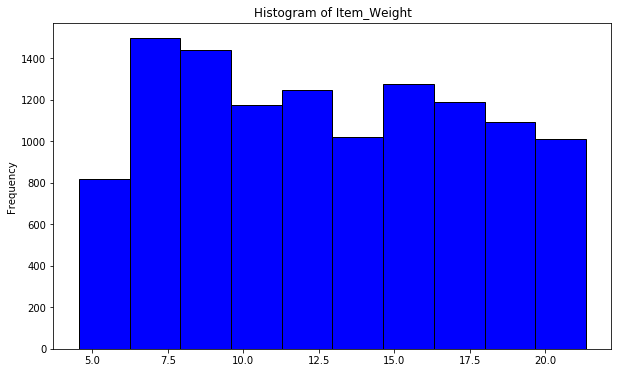

In [12]:
# Distribution of Weight Attributes
data.Item_Weight.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,6), 
                      title='Histogram of Item_Weight')

In [13]:
#Check the mean sales by type:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


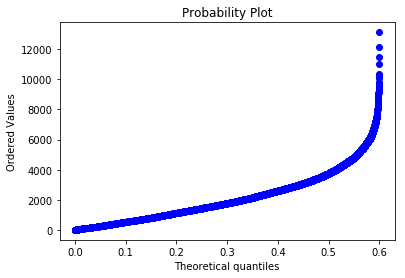

In [14]:
# Distrubtion of Target Variable - Item_Outlet_Sales
import pylab 
import scipy.stats as stats
stats.probplot(data.Item_Outlet_Sales, dist="uniform", plot=pylab)
pylab.show()

# Plotting the histogram on Combined dataset

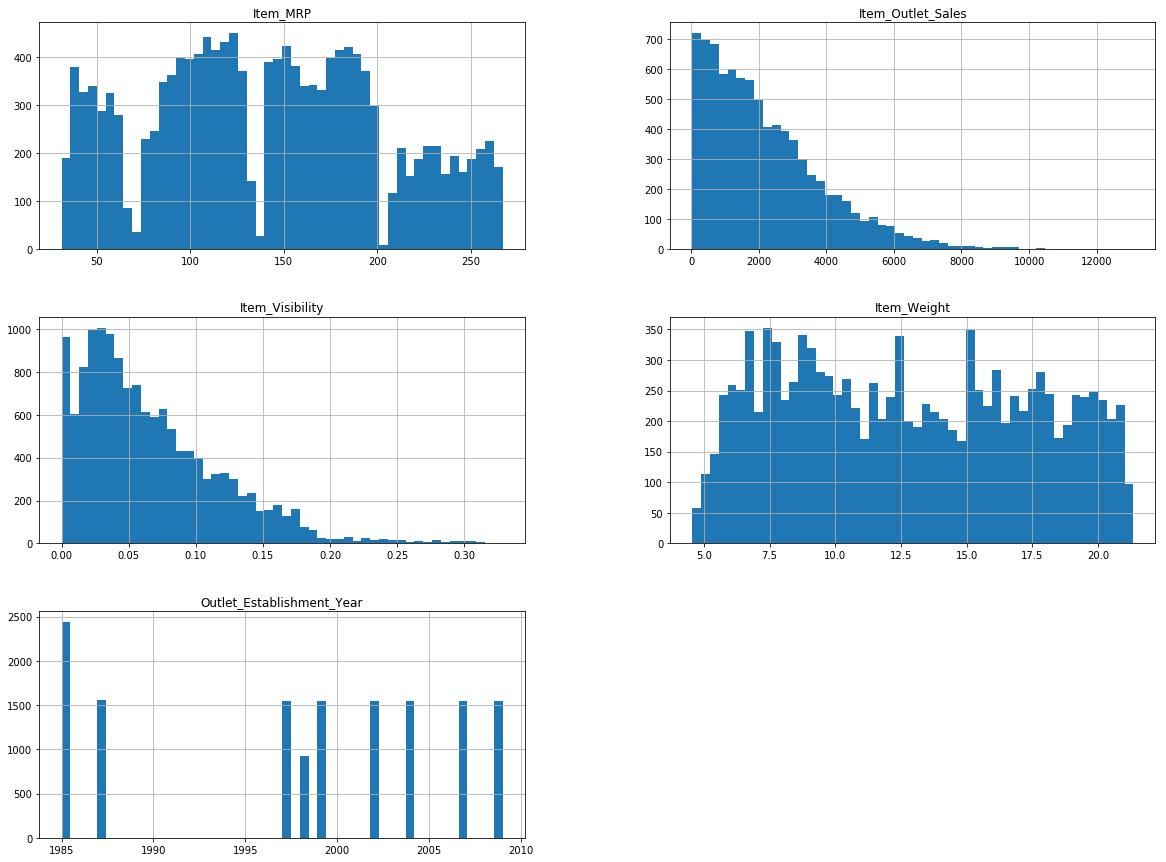

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

# Correlation Plot

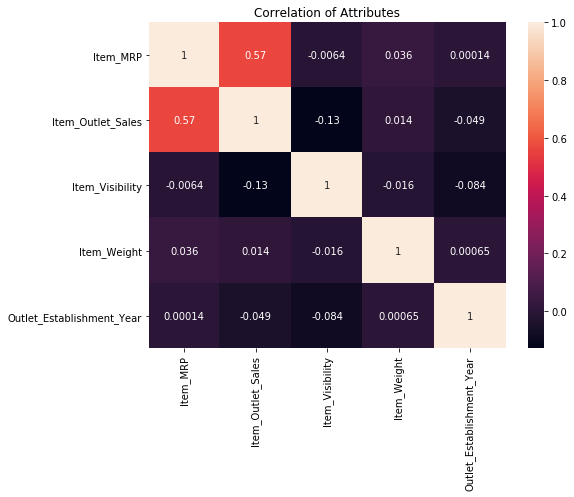

In [16]:
import seaborn as sns
f, ax = plt.subplots(figsize=[8,6])
sns.heatmap((data).corr(),
            annot=True)
ax.set_title("Correlation of Attributes")
plt.show()

# Replace Null values - Numerical Attributes

In [17]:
print (data['Item_Weight'].isnull().sum())
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
print(data['Item_Weight'].isnull().sum())

print (data['Outlet_Size'].isnull().sum())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode().iloc[0])
print (data['Outlet_Size'].isnull().sum())

2439
0
4016
0


In [18]:
#Impute for attribute with 0 value for Visibility

print ('Number of Records with Visibility = 0 is ', (data['Item_Visibility'] == 0).sum())
data['Item_Visibility'] = data['Item_Visibility'].mask(data['Item_Visibility'] == 0,data['Item_Visibility'].mean(skipna=True))
print ('Number of Records with Visibility = 0 is ', data['Item_Visibility'].isnull().sum())

Number of Records with Visibility = 0 is  879
Number of Records with Visibility = 0 is  0


In [19]:
# Head 10 records from Combined data
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.200000,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.930000,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.065953,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,Medium,Supermarket Type1,train


# Handling Categorical Values

In [20]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [21]:
#Years:
data['Outlet_Years'] = 2018 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        20.169319
std          8.371664
min          9.000000
25%         14.000000
50%         19.000000
75%         31.000000
max         33.000000
Name: Outlet_Years, dtype: float64

In [22]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [23]:
# Create Non Edible category:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Encoding Categorical Attributes

In [24]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [25]:
#One_Hot_Coding on the different catergories of dataset
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [26]:
# Display the combined dataset after encoding- 
name_of_attribs = list(data)
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
source                           2
Outlet_Years                     9
Outlet                          10
Item_Fat_Content_0               2
Item_Fat_Content_1               2
Item_Fat_Content_2               2
Outlet_Location_Type_0           2
Outlet_Location_Type_1           2
Outlet_Location_Type_2           2
Outlet_Size_0                    2
Outlet_Size_1                    2
Outlet_Size_2                    2
Outlet_Type_0                    2
Outlet_Type_1                    2
Outlet_Type_2                    2
Outlet_Type_3                    2
Item_Type_Combined_0             2
Item_Type_Combined_1             2
Item_Type_Combined_2             2
Outlet_Identifier_OUT010         2
Outlet_Identifier_OUT013         2
Outlet_Identifier_OU

# Implementation of Pipeline -

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [28]:
num_attribs = data[['Item_Weight','Item_Visibility']]

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

# Completing the Combined data Imputation and drop attributes

In [30]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [31]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,source,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,249.8092,3735.1380,0.016047,9.30,train,19,9,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,train,9,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,train,19,9,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.065953,19.20,train,20,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.065953,8.93,train,31,1,0,1,...,0,1,0,0,0,0,0,0,0,0


# Create Training and Test dataset from Combined dataset

In [32]:
#Divide into test and train:
trainr = data.loc[data['source']=="train"]
testr = data.loc[data['source']=="test"]

In [33]:
# Display the record count in each dataset
print (trainr.shape, testr.shape, data.shape)

(8523, 34) (5681, 34) (14204, 34)


In [34]:
#Drop Target from Test and manual identifier column:
testr.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
trainr.drop(['source'],axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
trainr.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,249.8092,3735.1380,0.016047,9.30,19,9,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,9,3,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,19,9,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.065953,19.20,20,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.065953,8.93,31,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
trainr.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,2181.288914,0.070202,12.846524,20.168133,4.722281,0.459697,0.187610,0.352693,0.280183,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,62.275067,1706.499616,0.048742,4.226194,8.371760,2.837201,0.498402,0.390423,0.477836,0.449115,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,31.290000,33.290000,0.003575,4.555000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.826500,834.247400,0.033085,9.310000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143.012800,1794.331000,0.062517,12.792854,19.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,185.643700,3101.296400,0.094585,16.000000,31.000000,7.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.888400,13086.964800,0.328391,21.350000,33.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
trainr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 33 columns):
Item_Identifier             8523 non-null object
Item_MRP                    8523 non-null float64
Item_Outlet_Sales           8523 non-null float64
Item_Visibility             8523 non-null float64
Item_Weight                 8523 non-null float64
Outlet_Years                8523 non-null int64
Outlet                      8523 non-null int64
Item_Fat_Content_0          8523 non-null uint8
Item_Fat_Content_1          8523 non-null uint8
Item_Fat_Content_2          8523 non-null uint8
Outlet_Location_Type_0      8523 non-null uint8
Outlet_Location_Type_1      8523 non-null uint8
Outlet_Location_Type_2      8523 non-null uint8
Outlet_Size_0               8523 non-null uint8
Outlet_Size_1               8523 non-null uint8
Outlet_Size_2               8523 non-null uint8
Outlet_Type_0               8523 non-null uint8
Outlet_Type_1               8523 non-null uint8
Outlet_Type_2       

In [38]:
testr.describe()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,141.023273,0.069782,12.712336,20.171097,4.722760,0.454321,0.19134,0.354339,0.280232,0.326703,...,0.065129,0.109312,0.108608,0.108784,0.061961,0.109840,0.109136,0.108960,0.109136,0.109136
std,61.809091,0.048393,4.245348,8.372256,2.837201,0.497953,0.39339,0.478355,0.449152,0.469049,...,0.246776,0.312057,0.311174,0.311395,0.241106,0.312718,0.311837,0.311616,0.311837,0.311837
min,31.990000,0.003591,4.555000,9.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.412000,0.033208,9.195000,14.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,141.415400,0.062137,12.792854,19.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,186.026600,0.093463,15.850000,31.000000,7.000000,1.000000,0.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.588400,0.323637,21.350000,33.000000,9.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Create the train and test dataset
Xtrain = trainr.drop(["Item_Outlet_Sales"], axis=1)
ytrain = trainr["Item_Outlet_Sales"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6392, 32) (2131, 32) (6392,) (2131,)


In [40]:
# Create a dataset without Item_Identifier
from sklearn.metrics import accuracy_score
predictors = [x for x in Xtrain.columns if x not in ['Item_Identifier']]
print(predictors)

['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Years', 'Outlet', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049']


# Pipeline and Baseline model without hypertuning

In [41]:
r_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('linear', LinearRegression())
    ])

r_pipeline.fit(X_train[predictors], y_train)
preds = r_pipeline.predict(X_test[predictors])

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [42]:
from sklearn import cross_validation, metrics
cv_score = cross_validation.cross_val_score(r_pipeline, X_train[predictors], y_train, cv=20, 
                                            scoring='mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
RMSE = cv_score.mean()
print('RMSE is ', RMSE)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scorin

RMSE is  1133.78661196509


In [43]:
from sklearn.metrics import mean_squared_error
RMSEd = mean_squared_error(preds, y_test)
RMSEsd=np.sqrt(RMSEd)
print('RMSE is ', RMSEsd)

RMSE is  1117.8685468213964


# Pipeline and Baseline model with hypertuning

## Implement L2 Regularization (Ridge)

In [44]:
from sklearn.linear_model import RidgeCV
reg=RidgeCV(alphas=[0.001, 0.1, 0.01])
reg.fit(X_train[predictors], y_train)

RidgeCV(alphas=[0.001, 0.1, 0.01], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [45]:
predridge=reg.predict(X_test[predictors])

In [46]:
from sklearn.metrics import mean_squared_error
RMSEridge = mean_squared_error(predridge, y_test)
RMSEridgesq=np.sqrt(RMSEridge)
print('RMSE ( Ridge) is ', RMSEridgesq)

RMSE ( Ridge) is  1116.9849907714172


# Implement L1 Regularization (Lasso)

In [47]:
from sklearn.linear_model import Lasso
regL=Lasso(alpha=0.0001,copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
regL.fit(X_train[predictors], y_train)
predlasso=regL.predict(X_test[predictors])
from sklearn.metrics import mean_squared_error
RMSElasso = mean_squared_error(predlasso, y_test)
RMSElassogesq=np.sqrt(RMSElasso)
print('RMSE ( Lasso ) is ', RMSElassogesq)

RMSE ( Lasso ) is  1116.9838603195938


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Implement Hypertune with GridSearchCV with Ridge()

In [48]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alphas = np.array([0.000001,0.00001,0.0001,0.001,0.01,0.1,1])
# create and fit a ridge regression model, testing each alpha
linmodel = Ridge()
grid = GridSearchCV(estimator=linmodel, param_grid=dict(alpha=alphas), scoring='mean_squared_error')
grid.fit(X_train[predictors], y_train)
print(grid)
# summarize the results of the grid search
print(np.sqrt(-grid.best_score_))
print(grid.best_estimator_.alpha)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)
1135.0964061667785
1.0


In [49]:
from sklearn.metrics import mean_squared_error
RMSEgrrid=grid.predict(X_test[predictors])
RMSEgrrid = mean_squared_error(RMSEgrrid, y_test)
RMSEgrrid=np.sqrt(RMSEgrrid)
print('Tuned RMSE ( Grid Ridge) is ', RMSEgrrid)

Tuned RMSE ( Grid Ridge) is  1116.9933586894301


# Implement Hypertune with RandomizedSearchCV with Ridge()

In [50]:
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=1000, 
                             scoring = 'neg_mean_squared_error')
rsearch.fit(X_train[predictors], y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=1000, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10df65630>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [51]:
rsearch.best_params_

{'alpha': 0.9994400065292883}

In [52]:
ridgepredhyper = rsearch.best_estimator_.predict(X_test[predictors])

In [53]:
from sklearn.metrics import mean_squared_error
RMSErid = mean_squared_error(ridgepredhyper, y_test)
RMSEride=np.sqrt(RMSErid)
print('RandonSearch ( Ridge ) RMSE is ', RMSEride)

RandonSearch ( Ridge ) RMSE is  1116.993353559343


# PCA Components Analysis

Text(0,0.5,'cumulative explained variance')

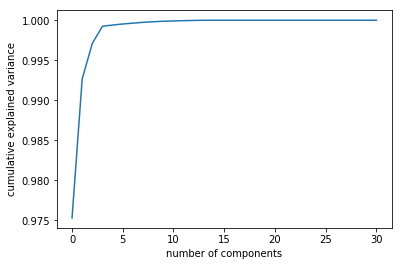

In [54]:
from sklearn.decomposition import PCA
pca = PCA()#n_components=7)  # I have selected 7 components to test as main features

pca.fit(X_test[predictors])
#print(pca.components_)
#print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


Looking at above plot we note that cumulative variance is explained by almost 7 components after that the graph flattens out

# Graph for Important Features

In [55]:
scaler=StandardScaler()
X_train_S=scaler.fit_transform(X_train[predictors])
X_test_S=scaler.fit_transform(X_test[predictors])

lr=LinearRegression()
lrmodl=lr.fit(X_train_S, y_train)

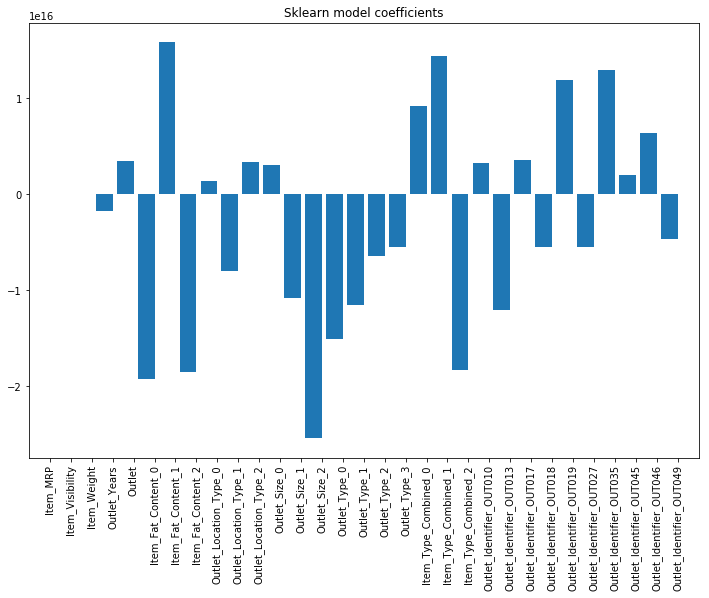

In [56]:
df=pd.DataFrame(X_train_S,columns=(X_train[predictors]).columns)
plt.figure(figsize=(12, 8))

plt.bar(np.arange(lrmodl.coef_.shape[0]) - 0.4, lrmodl.coef_)
plt.xticks(np.arange(lrmodl.coef_.shape[0]), df.columns, rotation='vertical')
plt.xlim([-1, lrmodl.coef_.shape[0]])
plt.title("Sklearn model coefficients");

# Feature Selection Implementation with Pipeline

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
#select = sklearn.feature_selection.SelectKBest(k='all')

select = SelectKBest(k=7)
print(select)

pipe = [('std_scaler', StandardScaler()), 
        ('feature_selection', select),
        ('linearmodel', LinearRegression())]

lrpipeline = Pipeline(pipe)

### fit your pipeline on X_train and y_train
lrpipeline.fit( X_train[predictors], y_train)

### call pipeline.predict() on your X_test data to make a set of test predictions

lrpred = lrpipeline.predict(X_test[predictors])

### test your predictions using sklearn.classification_report()

RMSEridlr = mean_squared_error(lrpred, y_test)
RMSEridlr=np.sqrt(RMSEridlr)
print('RMSE is ', RMSEridlr)

SelectKBest(k=7, score_func=<function f_classif at 0x10d1b5510>)
RMSE is  1116.8094486597147


# Consolidated Results with Various Models

In [58]:
results = pd.DataFrame(columns=["Description", "RMSE"])
results.loc[len(results)] = ["Ridge", RMSEridgesq]
results.loc[len(results)] = ["Lasso", RMSElassogesq]
results.loc[len(results)] = ["Ridge with Grid Search", RMSEgrrid]
results.loc[len(results)] = ["Ridge with Random Search", RMSEride]
results.loc[len(results)] = ["LR after feature selection", RMSEridlr]
results

,Description,RMSE
0,Ridge,1116.984991
1,Lasso,1116.983860
2,Ridge with Grid Search,1116.993359
3,Ridge with Random Search,1116.993354
4,LR after feature selection,1116.879950


## Decison Tree Implementation

In [60]:
from sklearn.tree import DecisionTreeRegressor

pipedesc = Pipeline([('std_scaler', StandardScaler()),
                     ('DescTremodel', DecisionTreeRegressor(max_depth=15, min_samples_leaf=100))])

In [61]:
dscrmol = pipedesc.fit(X_train[predictors], y_train)
#print(dscrmol.get_params())
preddesctree = dscrmol.predict(X_test[predictors])

In [62]:
from sklearn import cross_validation, metrics
cv_scoredesc = cross_validation.cross_val_score(pipedesc, X_train[predictors], y_train, cv=20, 
                                            scoring='mean_squared_error')
cv_scoredesct = np.sqrt(np.abs(cv_scoredesc))
RMSEdesc = cv_scoredesct.mean()
print('RMSE is ', RMSEdesc)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

RMSE is  1100.0491778476694


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


 RMSE ( Decision Tree) Not Tuned is  1103.6182109310132


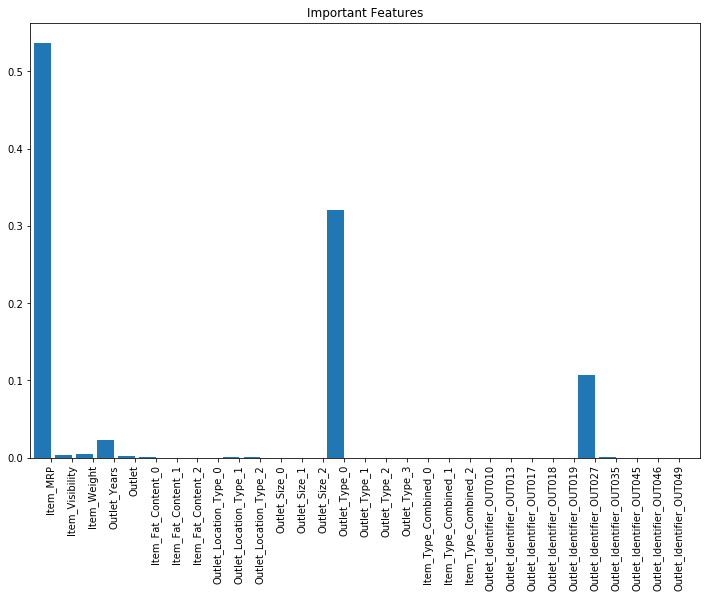

In [130]:
# Plotting Feature selection with Decision Tree

dectr_mod=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dectr_mod.fit(X_train[predictors], y_train)

RMSEdtgrid_y_wt=dectr_mod.predict(X_test[predictors])
RMSEdctgrid_wt = mean_squared_error(RMSEdtgrid_y_wt, y_test)
RMSEdctgrid_wt=np.sqrt(RMSEdctgrid_wt)

print(' RMSE ( Decision Tree) Not Tuned is ', RMSEdctgrid_wt)

df=pd.DataFrame(X_train_S,columns=(X_train[predictors]).columns)
plt.figure(figsize=(12, 8))
plt.bar(np.arange(dectr_mod.feature_importances_.shape[0]) - 0.4, dectr_mod.feature_importances_)
plt.xticks(np.arange(dectr_mod.feature_importances_.shape[0]),
           
df.columns, rotation='vertical')
plt.xlim([-1, dectr_mod.feature_importances_.shape[0]])
plt.title("Important Features");

In [128]:
# Grid Search for Algorithm Tuning for DecisionTree
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Ridge
max_depth = np.array([1,5,10,15,20,30,40,50,80,100])
min_samples_leaf=np.array([10,20,30,40,50,100,150,200,250,300,350,400])

params = {'max_depth': np.array([1,5,10,15,20,30,40,50,80,100]),'min_samples_leaf':np.array([50,100,150,200,250,300,350,400])}

# create and fit a ridge regression model, testing each alpha
#linmodel = dectr_mod
#grid_dc = GridSearchCV(estimator=dectr_mod, param_grid=dict(max_depth=max_depth),scoring='mean_squared_error')
grid_dc = GridSearchCV(estimator=dectr_mod, param_grid=params,scoring='mean_squared_error')
grid_dc.fit(X_train[predictors], y_train)
print(grid_dc)
# summarize the results of the grid search
print(np.sqrt(-grid_dc.best_score_))
print('Best Tree Depth',grid_dc.best_estimator_.max_depth)
print('Best Tree min samp leaf',grid_dc.best_estimator_.min_samples_leaf)


RMSEdtgrid_y_t=grid_dc.predict(X_test[predictors])
RMSEdctgrid_t = mean_squared_error(RMSEdtgrid_y_t, y_test)
RMSEdctgrid_t=np.sqrt(RMSEdctgrid_t)
print(' RMSE ( Decision Tree) Tuned is ', RMSEdctgrid_t)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   5,  10,  15,  20,  30,  40,  50,  80, 100]), 'min_samples_leaf': array([ 50, 100, 150, 200, 250, 300, 350, 400])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)
1088.7824008749033
Best Tree Depth 5
Best Tree min samp leaf 50
 RMSE ( Decision Tree) Tuned is  1085.1691970044897


In [131]:
#Best max depth for tree given by grid search is 5, let's train the model with 5 depth and calculate RMSE
tuned_dectr_mod=DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)
tuned_dectr_mod.fit(X_train_S, y_train)


from sklearn.metrics import mean_squared_error
RMSEdtgrid=grid_dc.predict(X_test[predictors])
RMSEdctgrid = mean_squared_error(RMSEdtgrid, y_test)
RMSEdctgrid=np.sqrt(RMSEdctgrid)
print('Tuned RMSE ( Decision Tree) is ', RMSEdctgrid)

Tuned RMSE ( Decision Tree) is  1085.1691970044897


## Random Forest Implementation

In [133]:
from sklearn.ensemble import RandomForestRegressor

piperandc = Pipeline([('std_scaler', StandardScaler()),
                     ('RandTremodel', RandomForestRegressor(n_estimators=200,max_depth=20, 
                                                            min_samples_leaf=100,n_jobs=4))])

In [134]:
randrmol = piperandc.fit(X_train[predictors], y_train)
#print(dscrmol.get_params())
preddesctree = randrmol.predict(X_test[predictors])

In [135]:
from sklearn import cross_validation, metrics
cv_scorerand = cross_validation.cross_val_score(piperandc, X_train[predictors], y_train, cv=20, 
                                            scoring='mean_squared_error')
cv_scorerandt = np.sqrt(np.abs(cv_scorerand))
RMSErand = cv_scorerandt.mean()
print('RMSE is ', RMSErand)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

RMSE is  1083.097893639947


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [136]:
from sklearn.ensemble import RandomForestRegressor

randfor=RandomForestRegressor(n_estimators=200,max_depth=20, min_samples_leaf=100,n_jobs=4)
randfor.fit(X_train[predictors], y_train)

from sklearn.metrics import mean_squared_error
RMSE_rf_y_grid=randfor.predict(X_test[predictors])
RMSEd_rf_wt = mean_squared_error(RMSE_rf_y_grid, y_test)
RMSEd_rf_wt=np.sqrt(RMSEd_rf_wt)
print('RMSE (Random Forest without tuned) is ', RMSEd_rf_wt)

RMSE (Random Forest without tuned) is  1088.9521464102056


In [137]:
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Ridge
max_depth = np.array([1,5,20,50,100])
min_samples_leaf=np.array([50,100,150,200])
n_estimators=np.array([100,200,300,400])
n_jobs=np.array([2,4])

params = {'max_depth': max_depth,
          'min_samples_leaf': min_samples_leaf,
          'n_estimators': n_estimators,
          'n_jobs': n_jobs}

grid_rf = GridSearchCV(estimator=randfor, param_grid=params,scoring='mean_squared_error')
grid_rf.fit(X_train[predictors], y_train)
print(grid_rf)


# summarize the results of the grid search
print(np.sqrt(-grid_rf.best_score_))
print('Best Tree Depth',grid_rf.best_estimator_.max_depth)
print('Best Tree min samp leaf',grid_rf.best_estimator_.min_samples_leaf)


RMSErfgrid_y_wt=grid_rf.predict(X_test[predictors])
RMSErfgrid_wt = mean_squared_error(RMSErfgrid_y_wt, y_test)
RMSErfgrid_wt=np.sqrt(RMSErfgrid_wt)
print(' RMSE ( Random Forest) Tuned is ', RMSErfgrid_wt)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   5,  20,  50, 100]), 'min_samples_leaf': array([ 50, 100, 150, 200]), 'n_estimators': array([100, 200, 300, 400]), 'n_jobs': array([2, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)
1085.403177374175
Best Tree Depth 5
Best Tree min samp leaf 50
 RMSE ( Random Forest) Tuned is  1080.2740112559875


In [138]:
print(grid_rf)
# summarize the results of the grid search
print(np.sqrt(-grid_rf.best_score_))
print('Best RF  Depth',grid_rf.best_estimator_.max_depth)
print('Best RF min samp leaf',grid_rf.best_estimator_.min_samples_leaf)
print('Best RF estimators',grid_rf.best_estimator_.n_estimators)
print('Best RF jobs',grid_rf.best_estimator_.n_jobs)

print(' RMSE ( Random Forest) Tuned is ', RMSErfgrid_wt)



GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   5,  20,  50, 100]), 'min_samples_leaf': array([ 50, 100, 150, 200]), 'n_estimators': array([100, 200, 300, 400]), 'n_jobs': array([2, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)
1085.403177374175
Best RF  Depth 5
Best RF min samp leaf 50
Best RF estimators 400
Best RF jobs 2
 RMSE ( Random Forest) Tuned is  1080.2740112559875


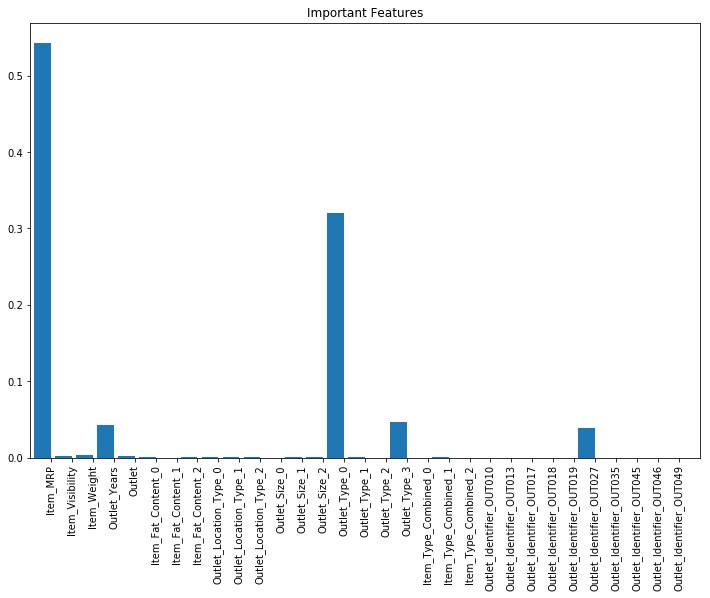

In [139]:
df=pd.DataFrame(X_train_S,columns=(X_train[predictors]).columns)
plt.figure(figsize=(12, 8))

plt.bar(np.arange(randfor.feature_importances_.shape[0]) - 0.4, randfor.feature_importances_)
plt.xticks(np.arange(randfor.feature_importances_.shape[0]), 
           df.columns, rotation='vertical')
plt.xlim([-1, randfor.feature_importances_.shape[0]])
plt.title("Important Features");


In [154]:
results = pd.DataFrame(columns=["Description", "RMSE"])
results.loc[len(results)] = ["Base Model", RMSE]
results.loc[len(results)] = ["Ridge", RMSEridgesq]
results.loc[len(results)] = ["Lasso", RMSElassogesq]
results.loc[len(results)] = ["Ridge with Grid Search", RMSEgrrid]
results.loc[len(results)] = ["Ridge with Random Search", RMSEride]
results.loc[len(results)] = ["LR after feature selection", RMSEridlr]
results.loc[len(results)] = ["Decison Tree without Tuned", RMSEdctgrid_wt]
results.loc[len(results)] = ["Decision Tree with Hyper Parameter Tuned", RMSEdctgrid_t]
results.loc[len(results)] = ["Random Forest without Tuned", RMSEd_rf_wt]
results.loc[len(results)] = ["Random Forest with Hyper Parameter Tuned", RMSErfgrid_wt]
results

,Description,RMSE
0,Base Model,1133.786612
1,Ridge,1116.984991
2,Lasso,1116.983860
3,Ridge with Grid Search,1116.993359
4,Ridge with Random Search,1116.993354
5,LR after feature selection,1116.809449
6,Decison Tree without Tuned,1103.618211
7,Decision Tree with Hyper Parameter Tuned,1085.169197
8,Random Forest without Tuned,1088.952146
9,Random Forest with Hyper Parameter Tuned,1080.274011


# Significance Test

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

kFolds=30
ran_reg = RandomForestRegressor()
ran_scores = cross_val_score(ran_reg, X_train[predictors], y_train,
                             scoring="neg_mean_squared_error", cv=kFolds)
control = ran_rmse_scores = np.sqrt(-ran_scores)
display_scores(ran_rmse_scores)

#Treatment system is a Decision Tree regression based pipeline
tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, X_train[predictors], y_train,
                         scoring="neg_mean_squared_error", cv=kFolds)
treatment = tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

#paired t-test; two-tailed p-value (aka two-sided)
(t_score, p_value) = stats.ttest_rel(control, treatment)
print("The p-value is %0.5f for a t-score of %0.5f." %(p_value, t_score))

if p_value > 0.05/2:  #Two sided 
    print('There is no significant difference between the two machine learning pipelines (Accept H0)')
else:
    print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
    if t_score < 0.0:
        print('Machine learning pipeline A is better than B')
    else:
        print('Machine learning pipeline B is better than A')

Scores: [1293.19322647 1307.50080778 1216.98138289 1234.50611989 1267.19375912
 1333.02711561 1194.44254828 1261.34848652 1114.60048262 1316.57851809
 1030.120002   1161.20620468 1336.74982033 1222.2801594  1173.29520021
 1236.85122765 1061.87421052 1161.03093893 1214.16619614  988.65351997
 1196.30823908 1154.88774828 1099.70876075 1084.72891534 1057.17377048
 1219.52253466 1223.55347414 1139.89990659 1116.37494431 1154.80110674]
Mean: 1185.7519775831497
Standard deviation: 89.255260882647
Scores: [1474.32156532 1831.01156312 1574.13245152 1624.44480192 1674.19581963
 1705.56169606 1584.72919734 1603.09410113 1516.06624058 1620.14881916
 1425.6669617  1556.9517531  1564.57651428 1617.04403307 1558.02587608
 1631.88387534 1704.50383163 1639.78525809 1524.99541194 1348.98927574
 1485.98646433 1599.76736979 1607.47066153 1375.5845887  1498.19954782
 1557.21354717 1699.36128351 1499.75100315 1712.04800867 1424.20318702]
Mean: 1574.6571569477844
Standard deviation: 105.2299283480472
The p-

# Predict on original Test Set using Random forest model with Hypertune

In [150]:
overallprediction=grid_rf.predict(testr[predictors])

In [153]:
print(overallprediction)

[1537.41315383 1483.95872946  593.25708246 ... 2010.66754357 3572.22946394
 1321.76825269]


# Overall Summary - 

Overall dataset - Initially, with Bigmart dataset, it has total of (14204, 13) records and was speratly provided 
with train(8523, 13) and test (5681, 12) dataset. It has 13 attributes with numerical and catagorical values. 

Below are the details on how we have processed and cleaned the data provided - data cleaning and preprocessing 
activities is performed on combined dataset with addition column added as "Source" to differentiate the data later
for splitting the data.

* **Data Exploration** – Analysed and plotted the categorical and continuous feature summaries to see which feature 
is closly related with target variable. This helped us with deciding which feature are influcing the prediction.

* **Data Cleaning and Feature engineering** – Encoding and imputing missing values in the data and checking for 
outliers with 
replacing with mean values and relabeling the values in categorical columns as to bring consistencies. 
Also, added additional columns for effective feature engineering.

* **Model Experiment** – Experiment has started with Linear Regression as Base model, followed with implementation on 
L1, L2 for regularization. Next implementation was with decision tree regressor and randomforest regressor.

* **Model tunning** - GridsearchCV and RandomizedSearchCV has been used tunning model and calculated the root mean 
square error.

* **Model Evaluation** - After all the experiments and results captured in Table, it is clear the results are better 
with RandonForestRegressor with hypertunning.

Below are the outcome of each model -
    - Base model (RMSE - 1133.786612)
    - Ridge(RMSE - 1116.984991)
    - Lasso (RMSE - 1116.983860)
    - Ridge with Grid Search (RMSE - 1116.993359)
    - Ridge with Random Search (RMSE -1116.993354)
    - LR after feature selection(RMSE -1116.809449)
    - Decison Tree without Tuned (RMSE -1103.618211)
    - Decision Tree with Hyper Parameter Tuned (RMSE -1085.169197)
    - Random Forest without Tuned	(RMSE -1088.952146)
    - Random Forest with Hyper Parameter Tuned (RMSE -1080.274011)

* **Model Significance** - The p-value is 0.00000 for a t-score of -21.46703. The two machine learning pipelines are 
different (reject H0) 
(t_score, p_value) = (-21.47, 0.00000). Machine learning Random Forest model is better than Decision Tree.

* **Kitchen Sink** - Below implementation is for Kitchen Sink, which has input of all the above listed 
alogorithms/ models, and calculated the Average generated by all the model.



## Kitchen sink - Ensemble Approach

In [91]:
y_train.describe()
len(X_test)

2131

In [101]:
#algorithms = [decision_tree_classification] #for classification
import numpy as np
from numpy import *
algorithms = [LinearRegression(),Lasso(), Ridge(), DecisionTreeRegressor(), 
              RandomForestRegressor()] #for regression

KSpredictions = np.zeros(shape=(2131,5))

for i,algorithm in enumerate(algorithms):
    KSpredictions[:,i] = algorithm.fit(X_train[predictors], y_train).predict(X_test[predictors])

In [106]:
print(KSpredictions[1:4,])
len(KSpredictions)

[[1308.16749304 1304.49404493 1308.36853166  223.7088     1488.99512   ]
 [2078.31907922 2093.22935517 2078.59808291 2816.334      1947.26526   ]
 [4286.57446639 4278.31071935 4285.79876192 6351.732      4703.34436   ]]


2131

## Simple Averaging

In [115]:
final_predictions = []
for i in range(len(KSpredictions)):
    final_predictions.append(mean(KSpredictions[i, ]))

In [117]:
final_predictions

[1395.048996436462,
 1126.7467979264227,
 2202.7491554610615,
 4781.152061532333,
 596.5850568022621,
 524.989734260204,
 1461.679157542626,
 1827.5014384263122,
 1503.89780889917,
 4017.2506543562586,
 2479.5507821450037,
 2766.4128714899916,
 2133.477351737051,
 2568.106070657763,
 1909.296001574552,
 1248.8976871076813,
 792.3468722404508,
 1339.8410973615962,
 453.52789295693344,
 2780.747296199355,
 3061.691468638429,
 -508.7078429901218,
 731.60766434286,
 3146.4701604129705,
 818.5482732230734,
 614.0582131645622,
 228.7957660258243,
 2014.326433205916,
 638.1508657623742,
 141.265339893379,
 2817.748912788801,
 2650.40057725571,
 2335.6985726931434,
 4693.988922817922,
 994.2580966868239,
 3705.8672805344513,
 3246.657570970629,
 2212.270552796454,
 3578.7092323842953,
 2448.5552107839226,
 2806.533880658032,
 4336.421744482675,
 2005.7639464098877,
 2512.6498942902554,
 404.87675931752665,
 3371.8890362648176,
 2913.23185597061,
 916.360637008481,
 43.83304708202062,
 2586.914

# Team Members - 

### - Arijit Sinha
### - Ritesh Tandon